In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

# CNN Example
The goal of this is to show the creation of feature maps for a CNN. The data created from this process is then fed into the rest of a NN

In [2]:
# Activation function
def sig(x):
    return (1 / (1 + math.exp(-1 * x)))

## Kernel
The kernel represents the specific feature we are extracting. In this case it is a 3x3 diagonal line

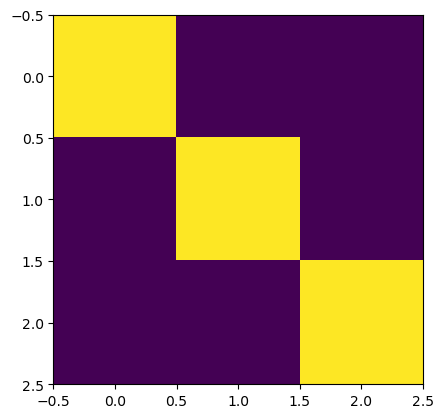

In [3]:
kernel = np.array([[1,-1,-1],[-1,1,-1],[-1,-1,1]])
plt.imshow(kernel)

## Input
The input here is a 6x6 image. For example purposes the top 3x3 of the image is identical to the feature we are extracting. The bottom left 3x3 is somewhat similar, and the rest of the image is significatnly different

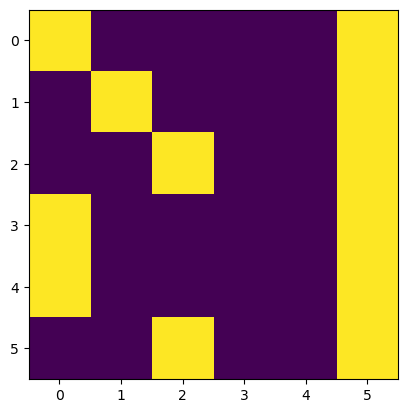

In [4]:
imex = np.array([[1,-1,-1,-1,-1,1],[-1,1,-1,-1,-1,1],[-1,-1,1,-1,-1,1],[1,-1,-1,-1,-1,1],[1,-1,-1,-1,-1,1],[-1,-1,1,-1,-1,1]])
plt.imshow(imex)

## Step 1
Here we loop over the original image, and do an element wise multiplication of each pixel against the kernel. After which we sum the kernel and create a 3x3 dataset (aka featuremap). The element wise multiplication is essentially our weights

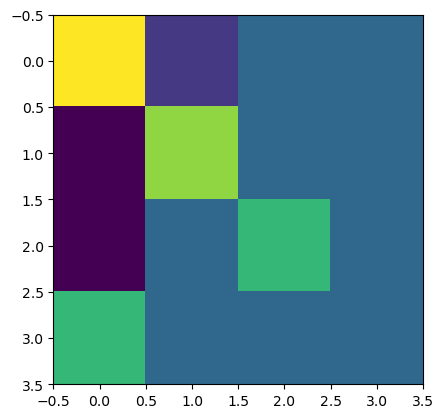

In [5]:
inw, inh = imex.shape
kw, kh = kernel.shape
h = inh - kh + 1
w = inw - kw + 1
fmaps = np.zeros((h,w))
for i in range(w):
    for j in range(h):
        submat = imex[i:i+kw, j:j+kh]
        res = np.multiply(submat, kernel)
        fmaps[i][j] = res.sum()
plt.imshow(fmaps)

## Step 2
Here we apply the activation function (sigmoid) and the bias (none here)

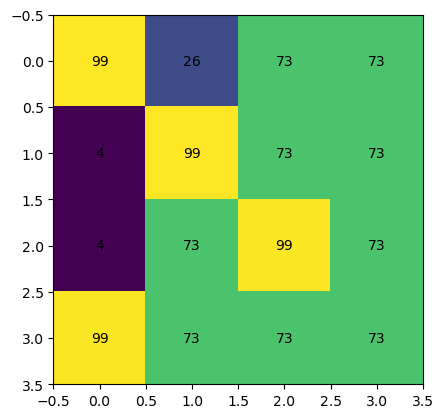

In [6]:
fig, ax = plt.subplots()
for i in range(0, len(fmaps[0])):
    for j in range(0, len(fmaps[i])):
        fmaps[i][j] = sig(fmaps[i][j])
im = plt.imshow(fmaps)

for i in range(0, len(fmaps[0])):
    for j in range(0, len(fmaps[i])):
        ax.text(j,i,math.floor(fmaps[i][j] * 100), ha="center", va="center", color="black")